<a href="https://colab.research.google.com/github/Ljosha/Fire_Plants/blob/ljosha/FirePlants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

       ID  SPECIES_ID  QUAD_ID                  SPECIES          QUAD_NAME  \
0  552874         101      514  Zantedeschia aethiopica       CALNEVA LAKE   
1  552875         101      639  Zantedeschia aethiopica            CALPINE   
2  552876         101     2319  Zantedeschia aethiopica       CALUMET MINE   
3  552877         101     2360  Zantedeschia aethiopica  CALUMET MOUNTAINS   
4  552878         101     1748  Zantedeschia aethiopica    CALVADA SPRINGS   

   ABUNDANCE  SPREAD                  ABUNSPREAD   MANAGEMENT        DATE  \
0          0       0  Suspected absent from quad  not managed  2011-06-27   
1          0       0  Suspected absent from quad  not managed  2011-06-27   
2          0       0  Suspected absent from quad  not managed  2011-09-13   
3          0       0  Suspected absent from quad  not managed  2011-09-13   
4          0       0  Suspected absent from quad  not managed  2011-06-30   

  SOURCE                                         PARTICIPAN OBS_NOTE

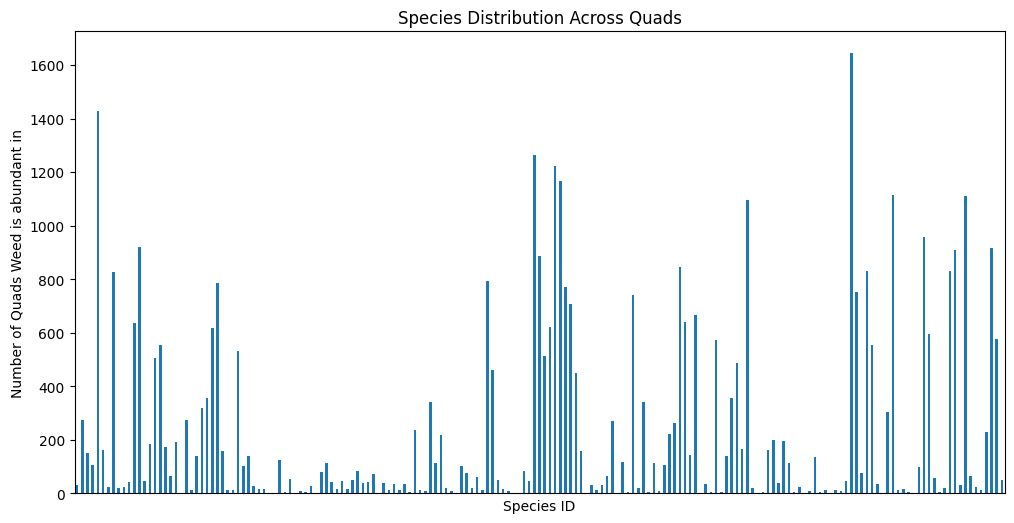

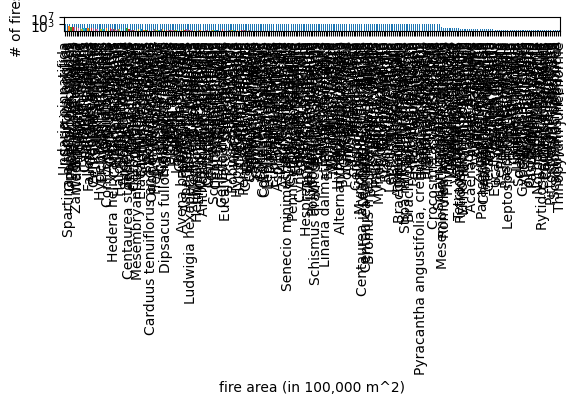

In [2]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

gdf = gpd.read_file("quads3310-20131231.shp")

print(gdf.head())

weeds = gdf[['ID', 'SPECIES', 'SPECIES_ID', 'QUAD_ID', 'ABUNDANCE',
       'SPREAD', 'DATE', 'geometry']]

weeds = weeds[weeds['ABUNDANCE'] != 9] #Remove species which couldn't be properly identified

print(f"Num Species: {len(list(set(weeds['SPECIES_ID'])))}, Num Reigons: {len(list(set(weeds['QUAD_ID'])))}")

species_quad = weeds[weeds["ABUNDANCE"] > 1].groupby("SPECIES_ID")["QUAD_ID"].nunique()

# Plot bar chart
plt.figure(figsize=(12, 6))
species_quad.plot(kind="bar")
plt.xticks([], [])
plt.xlabel("Species ID")
plt.ylabel("Number of Quads Weed is abundant in")
# plt.yscale("log")
plt.title("Species Distribution Across Quads")

california = gpd.read_file("CA_State.shp")
california = california.to_crs(epsg = 3857)
fires = gpd.read_file("Perimeters.shp")
fires = fires[fires.is_valid]
fires = fires.to_crs(epsg = 3857)

intersection = gpd.sjoin(fires, california, how='inner')
intersection.plot()

intersection["area"] = intersection.geometry.area

weeds_by_name = weeds['SPECIES'].value_counts()
weeds_by_name.plot(kind = 'bar')

reigons = [i*(100000) for i in range(101)]

for i in range(1, 101):
    plt.bar(i, len(intersection[intersection["area"]<=reigons[i]][intersection["area"]>reigons[i-1]]))
plt.bar(i, len(intersection[intersection["area"]>reigons[-1]]))

plt.xlabel("fire area (in 100,000 m^2)")
plt.ylabel("# of fires")
plt.yscale("log")
plt.show()

#For each weed, if a fire was in a quad and the weed was in a quad, +1
weeds_by_species = weeds[weeds["ABUNDANCE"] > 1].to_crs(intersection.crs)
weeds_by_name = weeds['SPECIES']
weeds_by_name.to_csv('weeds_by_name.csv')


for i in range(len(intersection)):
    weeds_by_species[f"intersects_target {i}"] = weeds_by_species.geometry.intersects(intersection.geometry.iloc[i]).astype(int)


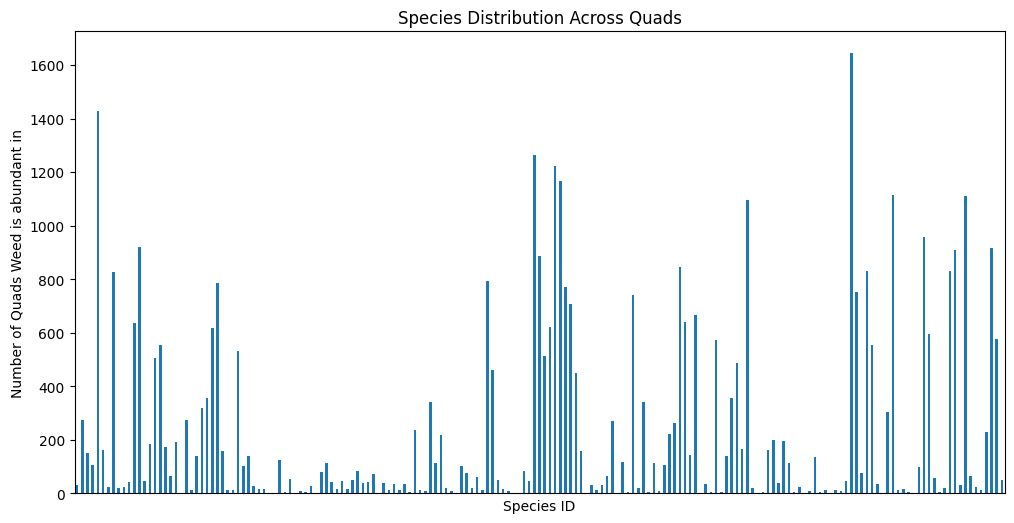

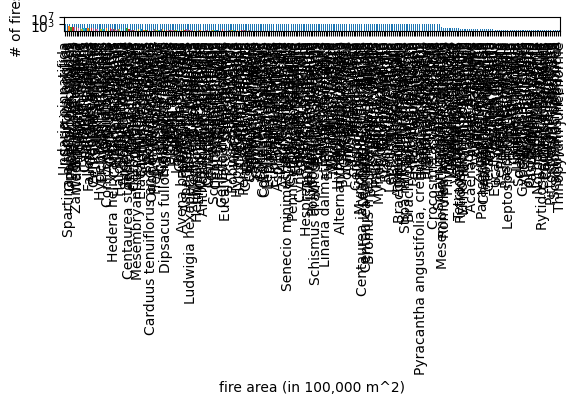

19

In [3]:
# Group by species_id and count number of unique quad_ids
species_quad = weeds[weeds["ABUNDANCE"] > 1].groupby("SPECIES_ID")["QUAD_ID"].nunique()

# Plot bar chart
plt.figure(figsize=(12, 6))
species_quad.plot(kind="bar")
plt.xticks([], [])
plt.xlabel("Species ID")
plt.ylabel("Number of Quads Weed is abundant in")
# plt.yscale("log")
plt.title("Species Distribution Across Quads")

california = gpd.read_file("CA_State.shp")
california = california.to_crs(epsg = 3857)
fires = gpd.read_file("Perimeters.shp")
fires = fires[fires.is_valid]
fires = fires.to_crs(epsg = 3857)

intersection = gpd.sjoin(fires, california, how='inner')
intersection.plot()

intersection["area"] = intersection.geometry.area

weeds_by_name = weeds['SPECIES'].value_counts()
weeds_by_name.plot(kind = 'bar')

reigons = [i*(100000) for i in range(101)]


for i in range(1, 101):
    plt.bar(i, len(intersection[intersection["area"]<=reigons[i]][intersection["area"]>reigons[i-1]]))
plt.bar(i, len(intersection[intersection["area"]>reigons[-1]]))

plt.xlabel("fire area (in 100,000 m^2)")
plt.ylabel("# of fires")
plt.yscale("log")
plt.show()

#For each weed, if a fire was in a quad and the weed was in a quad, +1
weeds_by_species = weeds[weeds["ABUNDANCE"] > 1].to_crs(intersection.crs)
weeds_by_name = weeds['SPECIES']
weeds_by_name.to_csv('weeds_by_name.csv')

for i in range(len(intersection)):
    weeds_by_species[f"intersects_target {i}"] = weeds_by_species.geometry.intersects(intersection.geometry.iloc[i]).astype(int)
weeds_by_species["fires"] = weeds_by_species[[f"intersects_target {i}" for i in range(len(intersection))]].sum(axis = 1)

# print(sum(weeds_by_species[weeds_by_species["SPECIES_ID"] == 1]["fires"]))

species_fire_count = [sum(weeds_by_species[weeds_by_species["SPECIES_ID"] == i]["fires"]) for i in list(set(weeds_by_species["SPECIES_ID"]))]

species_fire_count[0]

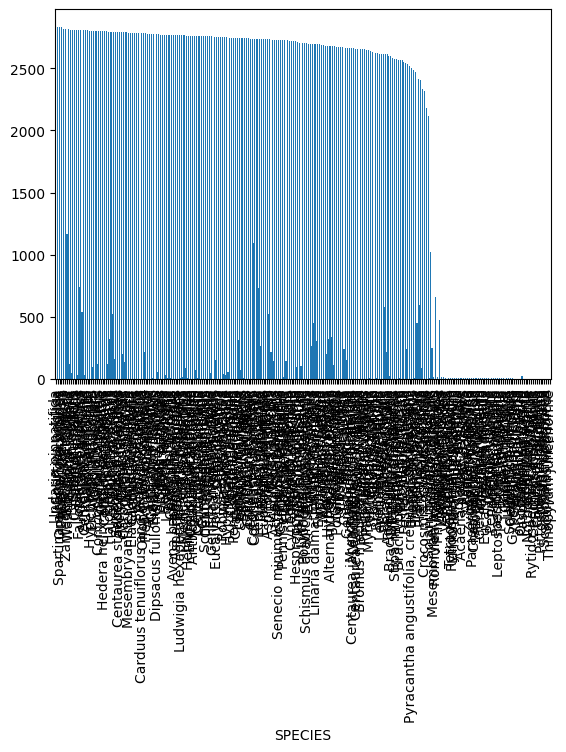

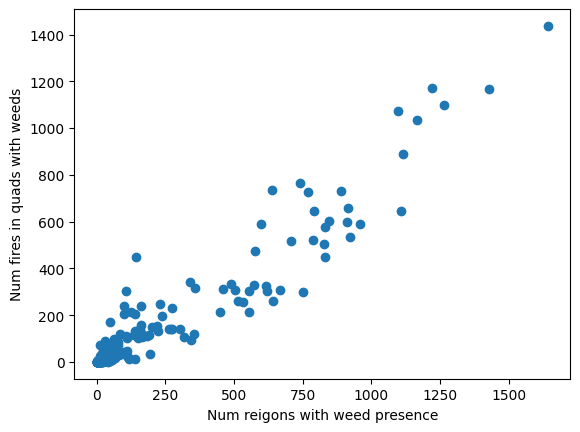

In [4]:
weeds_by_name = weeds['SPECIES'].value_counts()
weeds_by_name.plot(kind='bar')

plt.bar(list(set(weeds_by_species["SPECIES_ID"])), species_fire_count)
plt.show()
list(set(weeds_by_species["SPECIES"]))

plt.scatter(species_quad,species_fire_count)
plt.xlabel("Num reigons with weed presence")
plt.ylabel("Num fires in quads with weeds")
plt.show()

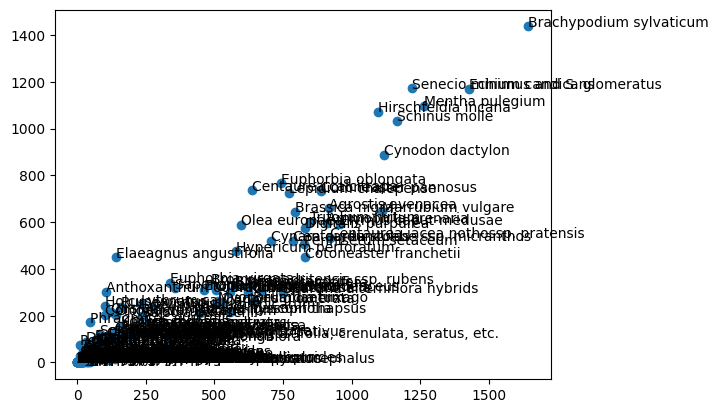

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

x = species_quad.tolist()
y = species_fire_count
labels = list(set(weeds_by_species["SPECIES"]))

plt.plot(x, y, 'o')
for i, txt in enumerate(labels):
  plt.annotate(txt, (x[i], y[i]))

plt.show()

Outlier species numbers are: 2729, 2739, 2671, 2808, 2740, 2637, 2674, 2715, 2750, 2715, 2624, 2678

Least Squares Calculations:
n = 179
sum(x) = 41690
sum(y) = 30722
sum(xy) = 22690443
sum(x^2) = 30296220
Slope (m) = (179 * 22690443 - 41690 * 30722) / (179 * 30296220 - 41690^2) = 0.7546306128938003
Intercept (b) = (30722 - 0.7546306128938003 * 41690) / 179 = -4.125979058896829
Regression line: y = 0.75x + -4.13

Points farthest from the regression line:
Point (142.00, 450.00), Distance = 276.96
Point (751.00, 297.00), Distance = 212.01
Point (637.00, 736.00), Distance = 207.08


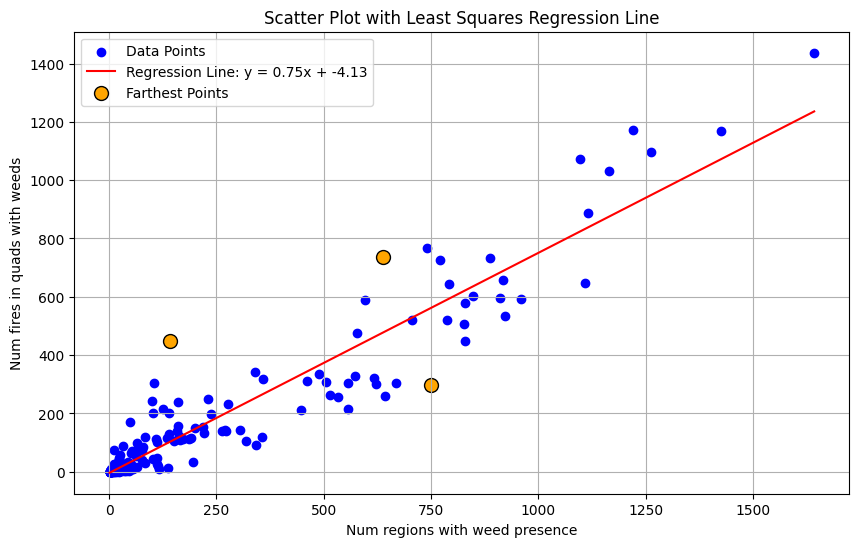

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array(species_quad)
y = np.array(species_fire_count)

n = len(x)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_xy = np.sum(x * y)
sum_x_squared = np.sum(x**2)

# Calculate slope (m)
m = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x**2)
# Calculate intercept (b)
b = (sum_y - m * sum_x) / n

# Print the calculations
print("Least Squares Calculations:")
print(f"n = {n}")
print(f"sum(x) = {sum_x}")
print(f"sum(y) = {sum_y}")
print(f"sum(xy) = {sum_xy}")
print(f"sum(x^2) = {sum_x_squared}")
print(f"Slope (m) = ({n} * {sum_xy} - {sum_x} * {sum_y}) / ({n} * {sum_x_squared} - {sum_x}^2) = {m}")
print(f"Intercept (b) = ({sum_y} - {m} * {sum_x}) / {n} = {b}")
print(f"Regression line: y = {m:.2f}x + {b:.2f}")

# Step 2: Generate points for the regression line
x_line = np.array([min(x), max(x)])
y_line = m * x_line + b

# Step 3: Calculate distances of each point to the regression line
# Distance from point (x0, y0) to line ax + by + c = 0 is |ax0 + by0 + c| / sqrt(a^2 + b^2)
# For line y = mx + b, rewrite as mx - y + b = 0, so a = m, b = -1, c = b
a = m
b_coeff = -1
c = b
distances = np.abs(a * x + b_coeff * y + c) / np.sqrt(a**2 + b_coeff**2)

# Find the indices of the 3 points farthest from the line
num_outliers = 3
farthest_indices = np.argsort(distances)[-num_outliers:][::-1]
print("\nPoints farthest from the regression line:")
for idx in farthest_indices:
    print(f"Point ({x[idx]:.2f}, {y[idx]:.2f}), Distance = {distances[idx]:.2f}")

# Step 4: Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x_line, y_line, color='red', label=f'Regression Line: y = {m:.2f}x + {b:.2f}')
# Highlight farthest points
plt.scatter(x[farthest_indices], y[farthest_indices], color='orange', s=100, label='Farthest Points', edgecolors='black')
plt.xlabel("Num regions with weed presence")
plt.ylabel("Num fires in quads with weeds")
plt.title("Scatter Plot with Least Squares Regression Line")
plt.legend()
plt.grid(True)

# Save the plot instead of showing it
plt.savefig('regression_with_farthest_points.png')

PCA Results:
Principal Components:
[[ 0.78626075  0.61789483]
 [-0.61789483  0.78626075]]
Explained Variance Ratio: [0.97565796 0.02434204]
First component explains 97.57% of variance
Second component explains 2.43% of variance

Comparison with Regression Line:
Regression line slope: 0.7546
First PCA component slope: 0.7859
Difference: 0.0312


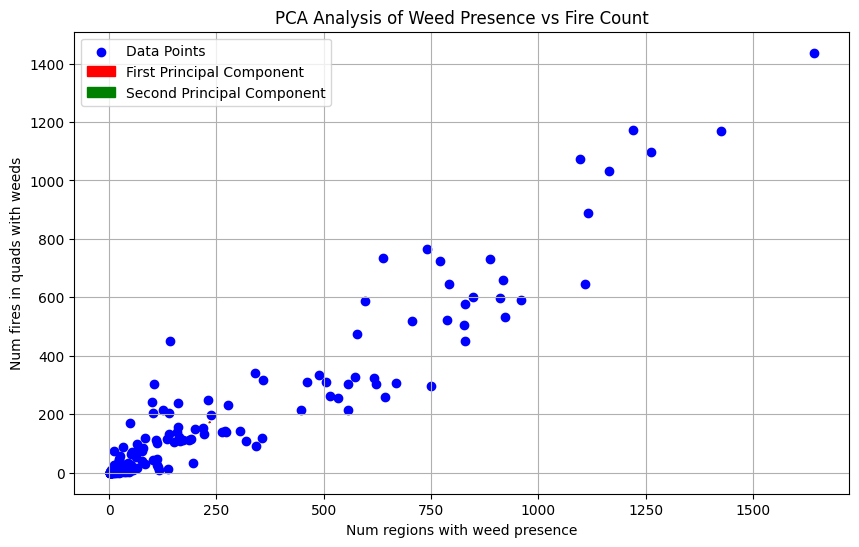

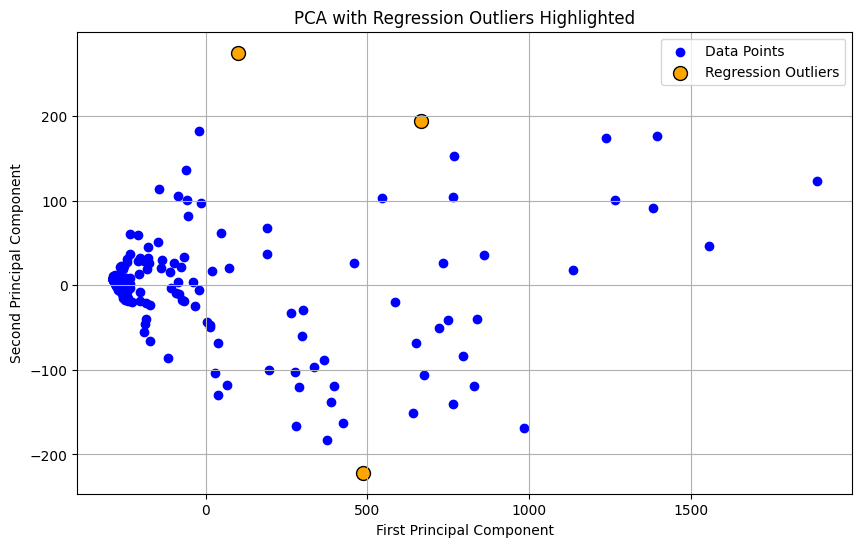

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming species_quad and species_fire_count are defined previously
x = np.array(species_quad)
y = np.array(species_fire_count)

# Combine the data into a feature matrix
data = np.column_stack((x, y))

# Perform PCA
pca = PCA(n_components=2)
pca.fit(data)
transformed_data = pca.transform(data)

# Get PCA components and explained variance
components = pca.components_
explained_variance = pca.explained_variance_ratio_

# Print PCA information
print("PCA Results:")
print(f"Principal Components:\n{components}")
print(f"Explained Variance Ratio: {explained_variance}")
print(f"First component explains {explained_variance[0]*100:.2f}% of variance")
print(f"Second component explains {explained_variance[1]*100:.2f}% of variance")

# Calculate the principal axes for visualization
mean = pca.mean_
principal_axis1 = mean + components[0] * 3 * np.sqrt(explained_variance[0])
principal_axis2 = mean + components[1] * 3 * np.sqrt(explained_variance[1])

# Create the PCA plot
plt.figure(figsize=(10, 6))
plt.scatter(data[:, 0], data[:, 1], color='blue', label='Data Points')

# Plot principal components as arrows
plt.arrow(mean[0], mean[1],
          components[0, 0] * 3 * np.sqrt(explained_variance[0]),
          components[0, 1] * 3 * np.sqrt(explained_variance[0]),
          color='red', width=0.1, label='First Principal Component')
plt.arrow(mean[0], mean[1],
          components[1, 0] * 3 * np.sqrt(explained_variance[1]),
          components[1, 1] * 3 * np.sqrt(explained_variance[1]),
          color='green', width=0.1, label='Second Principal Component')

plt.xlabel("Num regions with weed presence")
plt.ylabel("Num fires in quads with weeds")
plt.title("PCA Analysis of Weed Presence vs Fire Count")
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig('pca_analysis.png')

# Compare with the regression line from previous analysis
# The first principal component should be similar to the regression line direction
regression_slope = m  # from previous code
pca_slope = components[0, 1] / components[0, 0]

print("\nComparison with Regression Line:")
print(f"Regression line slope: {regression_slope:.4f}")
print(f"First PCA component slope: {pca_slope:.4f}")
print(f"Difference: {abs(regression_slope - pca_slope):.4f}")

# Highlight the same outliers from regression analysis in PCA space
if 'farthest_indices' in locals():
    plt.figure(figsize=(10, 6))
    plt.scatter(transformed_data[:, 0], transformed_data[:, 1], color='blue', label='Data Points')
    plt.scatter(transformed_data[farthest_indices, 0], transformed_data[farthest_indices, 1],
                color='orange', s=100, label='Regression Outliers', edgecolors='black')
    plt.xlabel("First Principal Component")
    plt.ylabel("Second Principal Component")
    plt.title("PCA with Regression Outliers Highlighted")
    plt.legend()
    plt.grid(True)
    plt.savefig('pca_with_outliers.png')